In [1]:
# Group Members:
# Caprichia Jeffers - caprichia.jeffers@chase.com
# zheng li zheng.li@chase.com
# Sajid Rauf: - sajid.m.rauf@chase.com
# Stephen McCoy - stephen.w.mccoy@jpmchase.com
# zhuyu.you@chase.com

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 150
pd.options.display.max_rows = 200

# 0. Create Dataset

In [3]:
app_train = pd.read_csv(r'./datasets/application_train.csv').drop_duplicates()
# drop columns with 60+% missing
miss_tbl = (app_train.isna().sum()/app_train.shape[0]).sort_values(ascending=False).reset_index()
#list(miss_tbl[miss_tbl[0]>0.6]['index'].unique())
app_train1 = (
    app_train
    .drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))  
)

corr_col = app_train1.columns[app_train1.columns.str.contains('AVG|MODE')]
app_train_final = (
    app_train1
    .drop(columns=list(corr_col))  
)

In [4]:
bu_orig = pd.read_csv(r'/Users/zheng/Downloads/bureau.csv').drop_duplicates()
bu_bal = pd.read_csv(r'/Users/zheng/Downloads/bureau_balance.csv').drop_duplicates()
bu_df = (
    bu_orig
    .merge(bu_bal, on='SK_ID_BUREAU', how='left')
)
# drop columns with 60+% missing
miss_tbl = (bu_df.isna().sum()/bu_df.shape[0]).sort_values(ascending=False).reset_index()
#list(miss_tbl[miss_tbl[0]>0.6]['index'].unique())
bu_df_nomiss60 = bu_df.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
bu_df_nomiss60.shape
bu_df_final = (
    bu_df_nomiss60
    .drop(columns={'SK_ID_BUREAU'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
bu_df_final.head()

,SK_ID_CURR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,AMT_ANNUITY_AVG,MONTHS_BALANCE_AVG
0,100001,-1009.284884,0.0,-456.029070,-908.421429,0.0,161516.250000,23893.770349,0.0000,0.0,-127.651163,1236.244186,-16.279070
1,100002,-996.781818,0.0,-452.800000,-808.400000,0.0,111388.838727,70223.142857,3198.8565,0.0,-631.963636,0.000000,-24.554545
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.0,254350.125000,0.000000,202500.0000,0.0,-816.000000,NaN,NaN
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.0,94518.900000,0.000000,0.0000,0.0,-532.000000,NaN,NaN
4,100005,-272.380952,0.0,253.428571,-123.000000,0.0,175903.714286,132923.785714,0.0000,0.0,-81.952381,608.785714,-4.333333


In [5]:
cc_bal    = pd.read_csv(r"/Users/zheng/Downloads/credit_card_balance.csv").drop_duplicates()
miss_tbl = (cc_bal.isna().sum()/cc_bal.shape[0]).sort_values(ascending=False).reset_index()
cc_bal_nomiss60 = cc_bal.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
cc_bal_final = (
    cc_bal_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
cc_bal_final.head()

,SK_ID_CURR,MONTHS_BALANCE_AVG,AMT_BALANCE_AVG,AMT_CREDIT_LIMIT_ACTUAL_AVG,AMT_DRAWINGS_ATM_CURRENT_AVG,AMT_DRAWINGS_CURRENT_AVG,AMT_DRAWINGS_OTHER_CURRENT_AVG,AMT_DRAWINGS_POS_CURRENT_AVG,AMT_INST_MIN_REGULARITY_AVG,AMT_PAYMENT_CURRENT_AVG,AMT_PAYMENT_TOTAL_CURRENT_AVG,AMT_RECEIVABLE_PRINCIPAL_AVG,AMT_RECIVABLE_AVG,AMT_TOTAL_RECEIVABLE_AVG,CNT_DRAWINGS_ATM_CURRENT_AVG,CNT_DRAWINGS_CURRENT_AVG,CNT_DRAWINGS_OTHER_CURRENT_AVG,CNT_DRAWINGS_POS_CURRENT_AVG,CNT_INSTALMENT_MATURE_CUM_AVG,SK_DPD_AVG,SK_DPD_DEF_AVG
0,100006,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
1,100011,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.0,3956.221849,4843.064189,4520.067568,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.0,25.767123,0.000000,0.000000
2,100013,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.0,1454.539551,7168.346250,6817.172344,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.0,18.719101,0.010417,0.010417
3,100021,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
4,100023,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000


In [6]:
ins_pmts  = pd.read_csv(r"/Users/zheng/Downloads/installments_payments.csv").drop_duplicates()
miss_tbl = (ins_pmts.isna().sum()/ins_pmts.shape[0]).sort_values(ascending=False).reset_index()
ins_pmts_nomiss60 = ins_pmts.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
ins_pmts_final = (
    ins_pmts_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
ins_pmts_final.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG
0,100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000


In [7]:
cash_bal  = pd.read_csv(r"/Users/zheng/Downloads/POS_CASH_balance.csv").drop_duplicates()
miss_tbl = (cash_bal.isna().sum()/cash_bal.shape[0]).sort_values(ascending=False).reset_index()
cash_bal_nomiss60 = cash_bal.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
cash_bal_final = (
    cash_bal_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
cash_bal_final.head()

,SK_ID_CURR,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG,SK_DPD_DEF_AVG
0,100001,-72.555556,4.000000,1.444444,0.777778,0.777778
1,100002,-10.000000,24.000000,15.000000,0.000000,0.000000
2,100003,-43.785714,10.107143,5.785714,0.000000,0.000000
3,100004,-25.500000,3.750000,2.250000,0.000000,0.000000
4,100005,-20.000000,11.700000,7.200000,0.000000,0.000000


In [8]:
prev_appl = pd.read_csv(r"/Users/zheng/Downloads/previous_application.csv").drop_duplicates()
miss_tbl = (prev_appl.isna().sum()/prev_appl.shape[0]).sort_values(ascending=False).reset_index()
prev_appl_nomiss60 = prev_appl.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
prev_appl_final = (
    prev_appl_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
prev_appl_final.head()

,SK_ID_CURR,AMT_ANNUITY_AVG,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100001,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,-1740.0,23.0,8.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100002,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,-606.0,500.0,24.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
2,100003,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,-1305.0,533.0,10.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
3,100004,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,-815.0,30.0,4.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
4,100005,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,-536.0,18.0,12.0,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000


# Merge All Datasets

In [9]:
df = (
    app_train_final
    .merge(bu_df_final, on='SK_ID_CURR', how='left')
    .merge(cc_bal_final, on='SK_ID_CURR', how='left')
    .merge(ins_pmts_final, on='SK_ID_CURR', how='left')
    .merge(cash_bal_final, on='SK_ID_CURR', how='left')
    .merge(prev_appl_final, on='SK_ID_CURR', how='left')   
)

In [10]:
df.shape

(307511, 143)

# 1. Data Quality Checks
    - Missingness and Outliers

In [11]:
df.sample(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,AMT_ANNUITY_AVG_x,MONTHS_BALANCE_AVG_x,MONTHS_BALANCE_AVG_y,AMT_BALANCE_AVG,AMT_CREDIT_LIMIT_ACTUAL_AVG,AMT_DRAWINGS_ATM_CURRENT_AVG,AMT_DRAWINGS_CURRENT_AVG,AMT_DRAWINGS_OTHER_CURRENT_AVG,AMT_DRAWINGS_POS_CURRENT_AVG,AMT_INST_MIN_REGULARITY_AVG,AMT_PAYMENT_CURRENT_AVG,AMT_PAYMENT_TOTAL_CURRENT_AVG,AMT_RECEIVABLE_PRINCIPAL_AVG,AMT_RECIVABLE_AVG,AMT_TOTAL_RECEIVABLE_AVG,CNT_DRAWINGS_ATM_CURRENT_AVG,CNT_DRAWINGS_CURRENT_AVG,CNT_DRAWINGS_OTHER_CURRENT_AVG,CNT_DRAWINGS_POS_CURRENT_AVG,CNT_INSTALMENT_MATURE_CUM_AVG,SK_DPD_AVG_x,SK_DPD_DEF_AVG_x,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
74296,186162,0,Cash loans,F,Y,Y,1,135000.0,472644.0,31716.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.010147,-9939,-1666,-1457.0,-1501,1,1,0,1,0,0,NaN,3.0,2,2,SATURDAY,13,0,0,0,0,0,0,Self-employed,0.631181,0.628389,NaN,0.0625,0.0742,0.9876,0.0,0.1379,0.1667,0.0340,0.0623,0.000,0.0,0.0,0.0,0.0,-256.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-179.000000,0.0,1650.000000,NaN,0.0,765000.0000,391806.00,NaN,0.0,-31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,-120.000000,-151.285714,7646.040000,7646.040000,-5.000000,10.000000,7.0,0.0,0.0,7646.040,67318.65,67318.65,0.0,67318.65,19.0,1.0,0.000000,-256.0,10.0,10.0,365243.0,-210.0,60.0,365243.0,365243.0,0.0
26041,130287,0,Cash loans,F,N,N,2,90000.0,679500.0,28917.0,679500.0,Family,Working,Incomplete higher,Married,House / apartment,0.026392,-14590,-6493,-2998.0,-4677,1,1,0,1,0,0,Core staff,4.0,2,2,SATURDAY,11,0,0,0,0,0,0,Kindergarten,NaN,0.515534,0.104795,0.0229,NaN,0.9692,0.0,0.0690,0.0417,NaN,0.0071,0.000,2.0,0.0,2.0,0.0,0.0,0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 143 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL_AVG
dtypes: float64(90), int64(41), object(12)
memory usage: 337.8+ MB


In [13]:
# drop columns with 60+% missing
miss_tbl = (df.isna().sum()/df.shape[0]).sort_values(ascending=False).reset_index()
#list(miss_tbl[miss_tbl[0]>0.6]['index'].unique())
df_nomiss60 = df.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))

In [14]:
df_nomiss60.shape

(307511, 121)

In [15]:
# drop highly correlated measure (keep median; drop ang, mode)
df_drop = df_nomiss60#.drop(columns=list(df_nomiss60.columns[df_nomiss60.columns.str.contains('AVG|MODE')]))

In [16]:
df_drop.shape

(307511, 121)

In [17]:
df_drop.TARGET.isna().sum()

0

In [18]:
df_drop.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [19]:
df_drop.dtypes.value_counts()

float64    68
int64      41
object     12
dtype: int64

In [20]:
df_drop.shape

(307511, 121)

In [21]:
# Create correlation matrix
corr_mat = df_drop.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

In [22]:
sorted_mat[sorted_mat > 0.8].tail(25)

DAYS_ENDDATE_FACT_AVG        DAYS_CREDIT_AVG               0.801587
AMT_GOODS_PRICE_AVG          AMT_ANNUITY_AVG_y             0.810091
DAYS_DECISION_AVG            DAYS_ENTRY_PAYMENT_AVG        0.813631
                             DAYS_INSTALMENT_AVG           0.813832
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.825575
DAYS_DECISION_AVG            MONTHS_BALANCE_AVG            0.828247
ELEVATORS_MEDI               APARTMENTS_MEDI               0.837447
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.860517
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.860627
LIVINGAREA_MEDI              ELEVATORS_MEDI                0.868341
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.879161
LIVINGAREA_MEDI              APARTMENTS_MEDI               0.915947
AMT_GOODS_PRICE_AVG          AMT_CREDIT_AVG                0.920165
                             AMT_APPLICATION_AVG           0.924799
MONTHS_BALANCE_AVG           DAYS_ENTRY_PAYMENT_

In [23]:
sorted_mat[sorted_mat < -0.8]

FLAG_EMP_PHONE                 DAYS_EMPLOYED            -0.999755
DAYS_LAST_DUE_1ST_VERSION_AVG  DAYS_FIRST_DRAWING_AVG   -0.848562
dtype: float64

In [24]:
# drop 1 variable with correlation of 0.8+
list(pd.DataFrame(sorted_mat[(sorted_mat < -0.8) | (sorted_mat > 0.8)]).reset_index()['level_0'])

['FLAG_EMP_PHONE',
 'DAYS_LAST_DUE_1ST_VERSION_AVG',
 'DAYS_ENDDATE_FACT_AVG',
 'AMT_GOODS_PRICE_AVG',
 'DAYS_DECISION_AVG',
 'DAYS_DECISION_AVG',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_DECISION_AVG',
 'ELEVATORS_MEDI',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAREA_MEDI',
 'CNT_FAM_MEMBERS',
 'LIVINGAREA_MEDI',
 'AMT_GOODS_PRICE_AVG',
 'AMT_GOODS_PRICE_AVG',
 'MONTHS_BALANCE_AVG',
 'MONTHS_BALANCE_AVG',
 'DAYS_TERMINATION_AVG',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_INSTALMENT_FUTURE_AVG',
 'AMT_CREDIT_AVG',
 'AMT_PAYMENT_AVG',
 'AMT_GOODS_PRICE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_ENTRY_PAYMENT_AVG']

In [25]:
df2 = (
    df_drop
    .drop(columns={'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_MEDI',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAREA_MEDI',
 'CNT_FAM_MEMBERS',
 'LIVINGAREA_MEDI',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_GOODS_PRICE',
 'OBS_60_CNT_SOCIAL_CIRCLE'})
)
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0250,0.0369,0.9722,0.0690,0.0833,0.0375,0.00,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-996.781818,0.0,-452.8,-808.400000,0.0,111388.838727,70223.142857,3198.8565,0.0,-631.963636,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-10.000000,24.000000,15.000000,0.0,0.0,9251.775,179055.00,179055.00,0.00,179055.00,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,1,MONDAY,11,0,0,0,0,School,0.311267,0.622246,NaN,0.0968,0.0529,0.9851,0.0345,0.2917,0.0132,0.01,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1400.750000,0.0,-544.5,-1097.333333,0.0,254350.125000,0.000000,202500.0000,0.0,-816.000000,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,-43.785714,10.107143,5.785714,0.0,0.0,56553.990,435436.50,484191.00,3442.50,435436.50,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,2,MONDAY,9,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-867.000000,0.0,-488.

In [26]:
df2.dtypes.value_counts()

float64    62
int64      37
object     12
dtype: int64

In [27]:
df2.shape

(307511, 111)

In [28]:
pd.Series(df2.isna().sum()/df2.shape[0]).sort_values(ascending=False).head(10)

LANDAREA_MEDI                   0.593767
BASEMENTAREA_MEDI               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MEDI              0.551792
APARTMENTS_MEDI                 0.507497
ENTRANCES_MEDI                  0.503488
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_MEDI    0.487810
OCCUPATION_TYPE                 0.313455
DAYS_ENDDATE_FACT_AVG           0.250905
dtype: float64

In [29]:
#profile = ProfileReport(df2, minimal=True)
#profile.to_file("df2_profile_output.html")

In [30]:
# Impute Missing Values
df2 = df2.fillna(df2.median())

#df2[df2.columns] = df2[df2.columns].apply(pd.to_numeric, errors='coerce')
#df2 = df2.fillna(df2.median()) 

/var/folders/hn/3wwh9yy571jbqjltnqglztg80000gn/T/ipykernel_84714/2311845062.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.fillna(df2.median())


In [31]:
#profile_bu = ProfileReport(bu, minimal=True)
#profile_bu.to_file('bu_profile_output.html')

In [32]:
df2.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE          

In [33]:
df2.shape

(307511, 111)

In [34]:
numerics = ['int64', 'float64', 'int32', 'int16']
catDf = df2.select_dtypes(exclude=numerics)
numDf = df2.select_dtypes(include=numerics)

In [35]:
df2.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE                object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
NAME_TYPE_SUITE                   object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                         int64
FLAG_WORK_PHONE                    int64
FLAG_CONT_MOBILE                   int64
FLAG_PHONE                         int64
FLAG_EMAIL      

In [36]:
df2[list(catDf.columns)] = df2[list(catDf.columns)].astype('category')

In [37]:
df2.dtypes.value_counts()

float64     62
int64       37
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [38]:
tbl = pd.DataFrame(numDf.nunique().sort_values(ascending=True)).reset_index()

In [39]:
list(tbl[(tbl[0]>2) & (tbl[0]<21)]['index'])

['REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN']

In [40]:
num_to_cat_cols = ['REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_QRT']
df2[num_to_cat_cols] = df2[num_to_cat_cols].astype('category')

In [41]:
df2.dtypes.value_counts()

float64     58
int64       36
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [42]:
df2.shape

(307511, 111)

In [43]:
numerics = ['int64', 'float64', 'int32', 'int16']
catDf2 = df2.select_dtypes(exclude=numerics)
numDf2 = df2.select_dtypes(include=numerics).drop(columns={'TARGET',
                                                           #'bu_data_ind','CREDIT_HISTORY','UTIL',
                                                           #'HC_LOAN_IND', 'HC_LOAN_CNT', 'HC_Approved',
                                                           #'HC_Canceled','HC_Refused','HC_Unused_offer',
                                                           #'HC_CC_IND','HC_CC_LOAN_CNT','HC_CC_CURRENT_BALANCE',
                                                           #'HC_CC_CREDIT_LIMIT_ACTUAL','HC_CC_CURRENT_SK_DPD',
                                                           #'HC_CC_CURRENT_SK_DPD_DEF','HC_CC_CNT_EVER_DPD',
                                                           #'HC_CC_CNT_EVER_DPD_DEF','HC_CASH_IND','HC_POS_LOAN_CNT',
                                                           #'HC_POS_CURRENT_MIN_TERM','HC_POS_CURRENT_MAX_TERM',
                                                           #'HC_POS_CURRENT_SK_DPD','HC_POS_CURRENT_SK_DPD_DEF',
                                                           #'HC_POS_CNT_EVER_DPD','HC_POS_CNT_EVER_DPD_DEF',
                                                           #'HC_INST_IND','HC_INST_LOAN_CNT','AMT_INSTALMENT',
                                                           #'HC_INST_MIN_DYAS','HC_INST_MAX_DYAS',
                                                           #'HC_INST_CURRENT_DLQ','HC_INST_CNT_EVER_DPD',
                                                           #'debt_active_current_mo'
                                                          })

In [44]:
catDf2.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

In [45]:
numDf2.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100002,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,10,0,0,0,0,0.083037,0.262949,0.139376,0.0250,0.0369,0.9722,0.0690,0.0833,0.0375,0.0000,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,-996.781818,0.0,-452.8,-808.400000,0.0,111388.838727,70223.142857,3198.8565,0.0,-631.963636,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-10.000000,24.000000,15.000000,0.0,0.0,9251.775,179055.00,179055.00,0.00,179055.00,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,11,0,0,0,0,0.311267,0.622246,0.535276,0.0968,0.0529,0.9851,0.0345,0.2917,0.0132,0.0100,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,-1400.750000,0.0,-544.5,-1097.333333,0.0,254350.125000,0.000000,202500.0000,0.0,-816.000000,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,-43.785714,10.107143,5.785714,0.0,0.0,56553.990,435436.50,484191.00,3442.50,435436.50,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,9,0,0,0,0,0.505998,0.555912,0.729567,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,-867.000000,0.0,-488.5,-532.500000,0.0,94518.900000,0.000000,0.0000,0.0,-532.000000,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,-25.500000,3.750000,2.250000,0.0,0.0,5357.250,24282.00,20106.00,4860.00,24282.00,5.000000,1.0,0.212008,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,100006,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,17,0,0,0,0,0.505998,0.650442,0.535276,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,-1116.500000,0.0,-206.0,-956.000000,0.0,188810.835268,36886.500000,0.0000,0.0,-519.000000,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438,-9.619048,12.000000,8.650000,0.0,0.0,23651.175

In [46]:
########
#df2 = df2.dropna()
#######

In [47]:
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0250,0.0369,0.9722,0.0690,0.0833,0.0375,0.0000,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-996.781818,0.0,-452.800000,-808.400000,0.000000,111388.838727,70223.142857,3198.8565,0.0,-631.963636,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-10.000000,24.000000,15.000000,0.000000,0.000000,9251.775000,179055.000,179055.00,0.00,179055.000,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,1,MONDAY,11,0,0,0,0,School,0.311267,0.622246,0.535276,0.0968,0.0529,0.9851,0.0345,0.2917,0.0132,0.0100,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1400.750000,0.0,-544.500000,-1097.333333,0.000000,254350.125000,0.000000,202500.0000,0.0,-816.000000,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,-43.785714,10.107143,5.785714,0.000000,0.000000,56553.990000,435436.500,484191.00,3442.50,435436.500,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,2,MONDAY,9,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,0.0,0.0,-815.0,

In [48]:
# One Hot Encoding & Scaling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(  # this function scales and encodes our data in 1 step
    (MinMaxScaler(), # columns to scale
        list(numDf2.columns)),
    (OneHotEncoder(handle_unknown='ignore'), # columns to encode
        list(catDf2.columns))
)

In [49]:
df2.dropna(inplace=True)

In [50]:
df2.shape

(210213, 111)

In [51]:
df2.isna().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
REGION_RATING_CLIENT             0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_ST

In [52]:
from sklearn.model_selection import train_test_split
X = df2.drop('TARGET', axis=1)
y = df2['TARGET']
y=y.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
X_train.shape, y_train.shape

((168170, 110), (168170,))

In [54]:
# Fit
transformer.fit(X_train)
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [54]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE 
# Instantiating the SMOTE class
oversampler= SMOTE()

In [55]:
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [56]:
X_train.shape, y_train.shape

((306768, 250), (306768,))

In [57]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, the shape of train_X: (306768, 250)
After OverSampling, the shape of train_y: (306768,) 

After OverSampling, counts of label '1': 153384
After OverSampling, counts of label '0': 153384


In [58]:
# build the model

In [59]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

2022-06-13 17:21:26,490:DEBUG:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2022-06-13 17:21:26,623:DEBUG:Creating converter from 7 to 5
2022-06-13 17:21:26,623:DEBUG:Creating converter from 5 to 7
2022-06-13 17:21:26,624:DEBUG:Creating converter from 7 to 5
2022-06-13 17:21:26,624:DEBUG:Creating converter from 5 to 7


In [62]:
# How to track the LOSS of the model:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [118]:
tf.random.set_seed(42)
model = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse,'accuracy']
)
history = model.fit(X_train, y_train, batch_size=500, epochs=100)

Epoch 1/100
 19/614 [..............................] - ETA: 3s - loss: 0.5087 - rmse: 0.5087 - accuracy: 0.5717 

2022-06-13 20:28:09.161254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


614/614 [==============================] - 3s 5ms/step - loss: 0.3968 - rmse: 0.3967 - accuracy: 0.7769
Epoch 2/100
614/614 [==============================] - 3s 5ms/step - loss: 0.3394 - rmse: 0.3394 - accuracy: 0.8554
Epoch 3/100
614/614 [==============================] - 3s 5ms/step - loss: 0.3159 - rmse: 0.3159 - accuracy: 0.8765
Epoch 4/100
614/614 [==============================] - 3s 5ms/step - loss: 0.2994 - rmse: 0.2994 - accuracy: 0.8910
Epoch 5/100
614/614 [==============================] - 3s 5ms/step - loss: 0.2874 - rmse: 0.2874 - accuracy: 0.8989
Epoch 6/100
614/614 [==============================] - 3s 5ms/step - loss: 0.2765 - rmse: 0.2765 - accuracy: 0.9047
Epoch 7/100
614/614 [==============================] - 3s 5ms/step - loss: 0.2675 - rmse: 0.2675 - accuracy: 0.9087
Epoch 8/100
614/614 [==============================] - 3s 5ms/step - loss: 0.2585 - rmse: 0.2584 - accuracy: 0.9136
Epoch 9/100
614/614 [==============================] - 3s 5ms/step - loss: 0.2501 - 

In [119]:
predictions = model.predict(X_test)

2022-06-13 20:35:10.979983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [120]:
predictions = np.ravel(predictions)

In [121]:
pred_train = np.ravel(model.predict(X_train))
rmse(y_train, pred_train).numpy()

0.12894101

In [122]:
rmse(y_test, predictions).numpy()

0.40869698

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

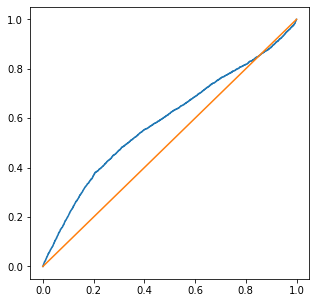

In [125]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

In [126]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.5872480284012457

In [127]:
#pred_cat = [1 if x > 0.5 else 0 for x in predictions]

In [128]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_cat))

[[35535  2799]
 [ 3125   584]]


In [61]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, pred_cat)

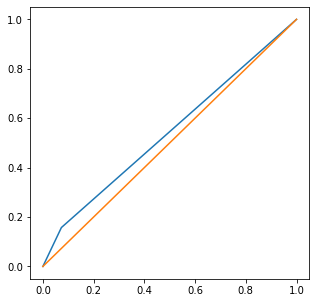

In [131]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_cat)

0.5422193590603221

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear', random_state=1,max_iter=3000)

In [56]:
lg.fit(X_train,y_train)

LogisticRegression(max_iter=3000, random_state=1, solver='liblinear')

In [57]:
y_pred = lg.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9112813072330709

In [59]:
cm

array([[38251,    83],
       [ 3647,    62]])

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

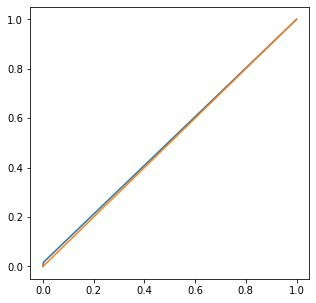

In [63]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

In [140]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.680680277617782

In [107]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
x = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, x).fit()

#view model summary
print(model.summary())

In [ ]:
2. Data Cleaning
3. EDA (Provide insights based on ANALYSIS prior to building the model)
    - Training data only
    - Include description and conclusions
4. Scaling/Normalizing/OHE
    - Update appropriate EDA
5. Algorithm Harness to choose the BEST model
    - Leverage code at begining of course to get output from different methods
    - Choose two models (likley logistic and NN) to build and compare
6. Hyperparameter Tuning
7. Create a Web Service from your model and call it from a Web Application